In [4]:
# importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



### importing the data

In [7]:
df = pd.read_csv("C:\\Users\\DELL\Downloads\\Project 2 - Diabetes Data-20240630T140352Z-001\\Project 2 - Diabetes Data\\Project 2 MeriSKILL\\diabetes.csv")

### printing the first 5 rows of the dataset


In [8]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# getting the statistical measure of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.describe().T # the data shows that the minimum value for glucose, BMI, INsulin< Blood pressure and skinthickness are zero which is not right


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 ---- Non Diabetic
1----- Diabetic

In [12]:
df.info() # the check for the details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.isnull().sum()# checking for null values
# it shows that there are no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

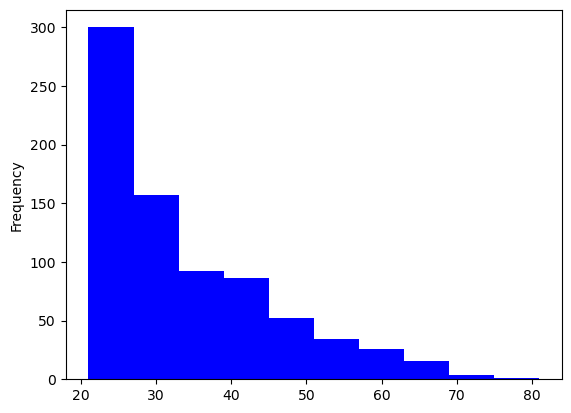

In [14]:
df.Age.plot(color="blue",kind="hist") # the histogram shows that almost three hundred are within the age of 20's while the least number are 80's 
plt.show()

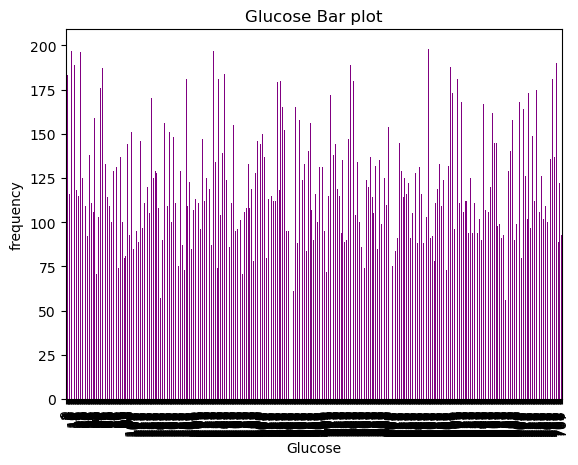

In [15]:
df.Glucose.plot(color="purple",kind="bar")
plt.xlabel("Glucose")
plt.ylabel("frequency")
plt.title("Glucose Bar plot")
plt.show()

In [16]:
corr_matrix = df.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

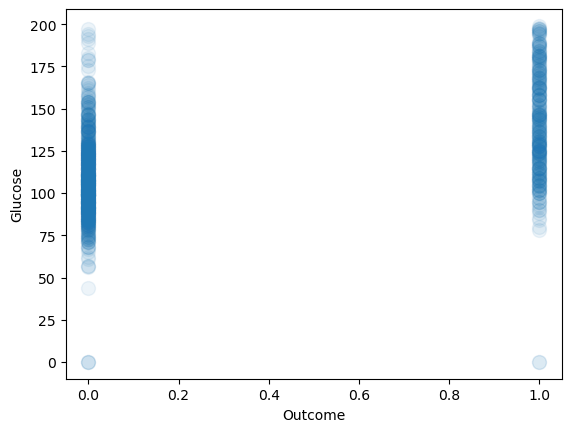

In [17]:
df.plot(kind = 'scatter', x = 'Outcome',y = 'Glucose',s = 100 ,alpha = 0.08)

plt.show()

In [18]:
df_copy = df.copy(deep = True) # i change the data with 0's to NaN value
df_copy[['Glucose','BloodPressure','SkinThickness','BMI','Insulin']] = df_copy[['Glucose','BloodPressure','SkinThickness','BMI','Insulin']].replace(0,np.NaN)

In [19]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

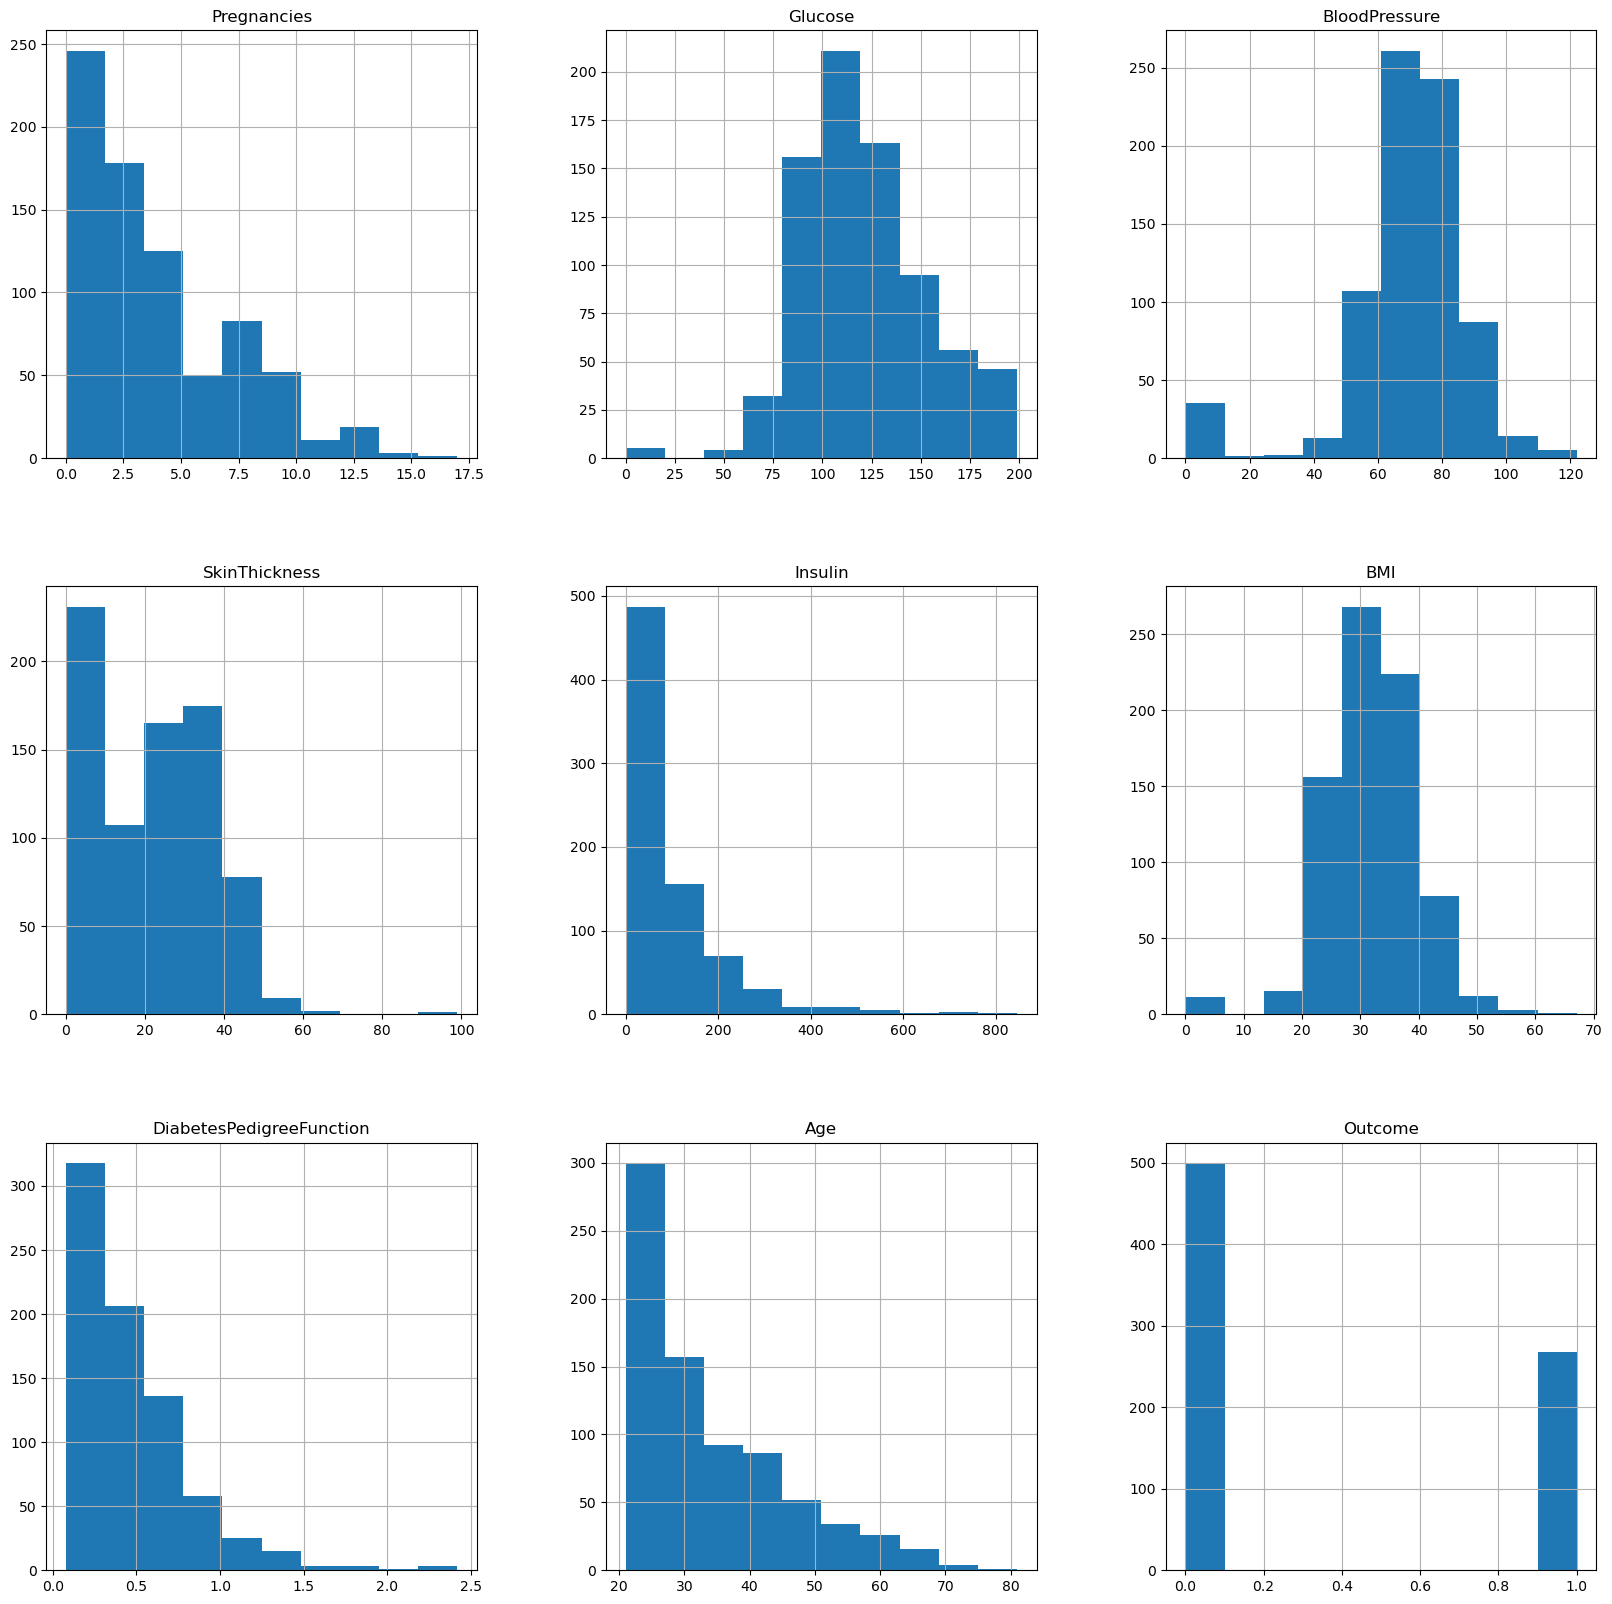

In [20]:
df.hist(figsize=(20,20)) 
plt.show()

In [21]:
#filling the missing values
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace = True)

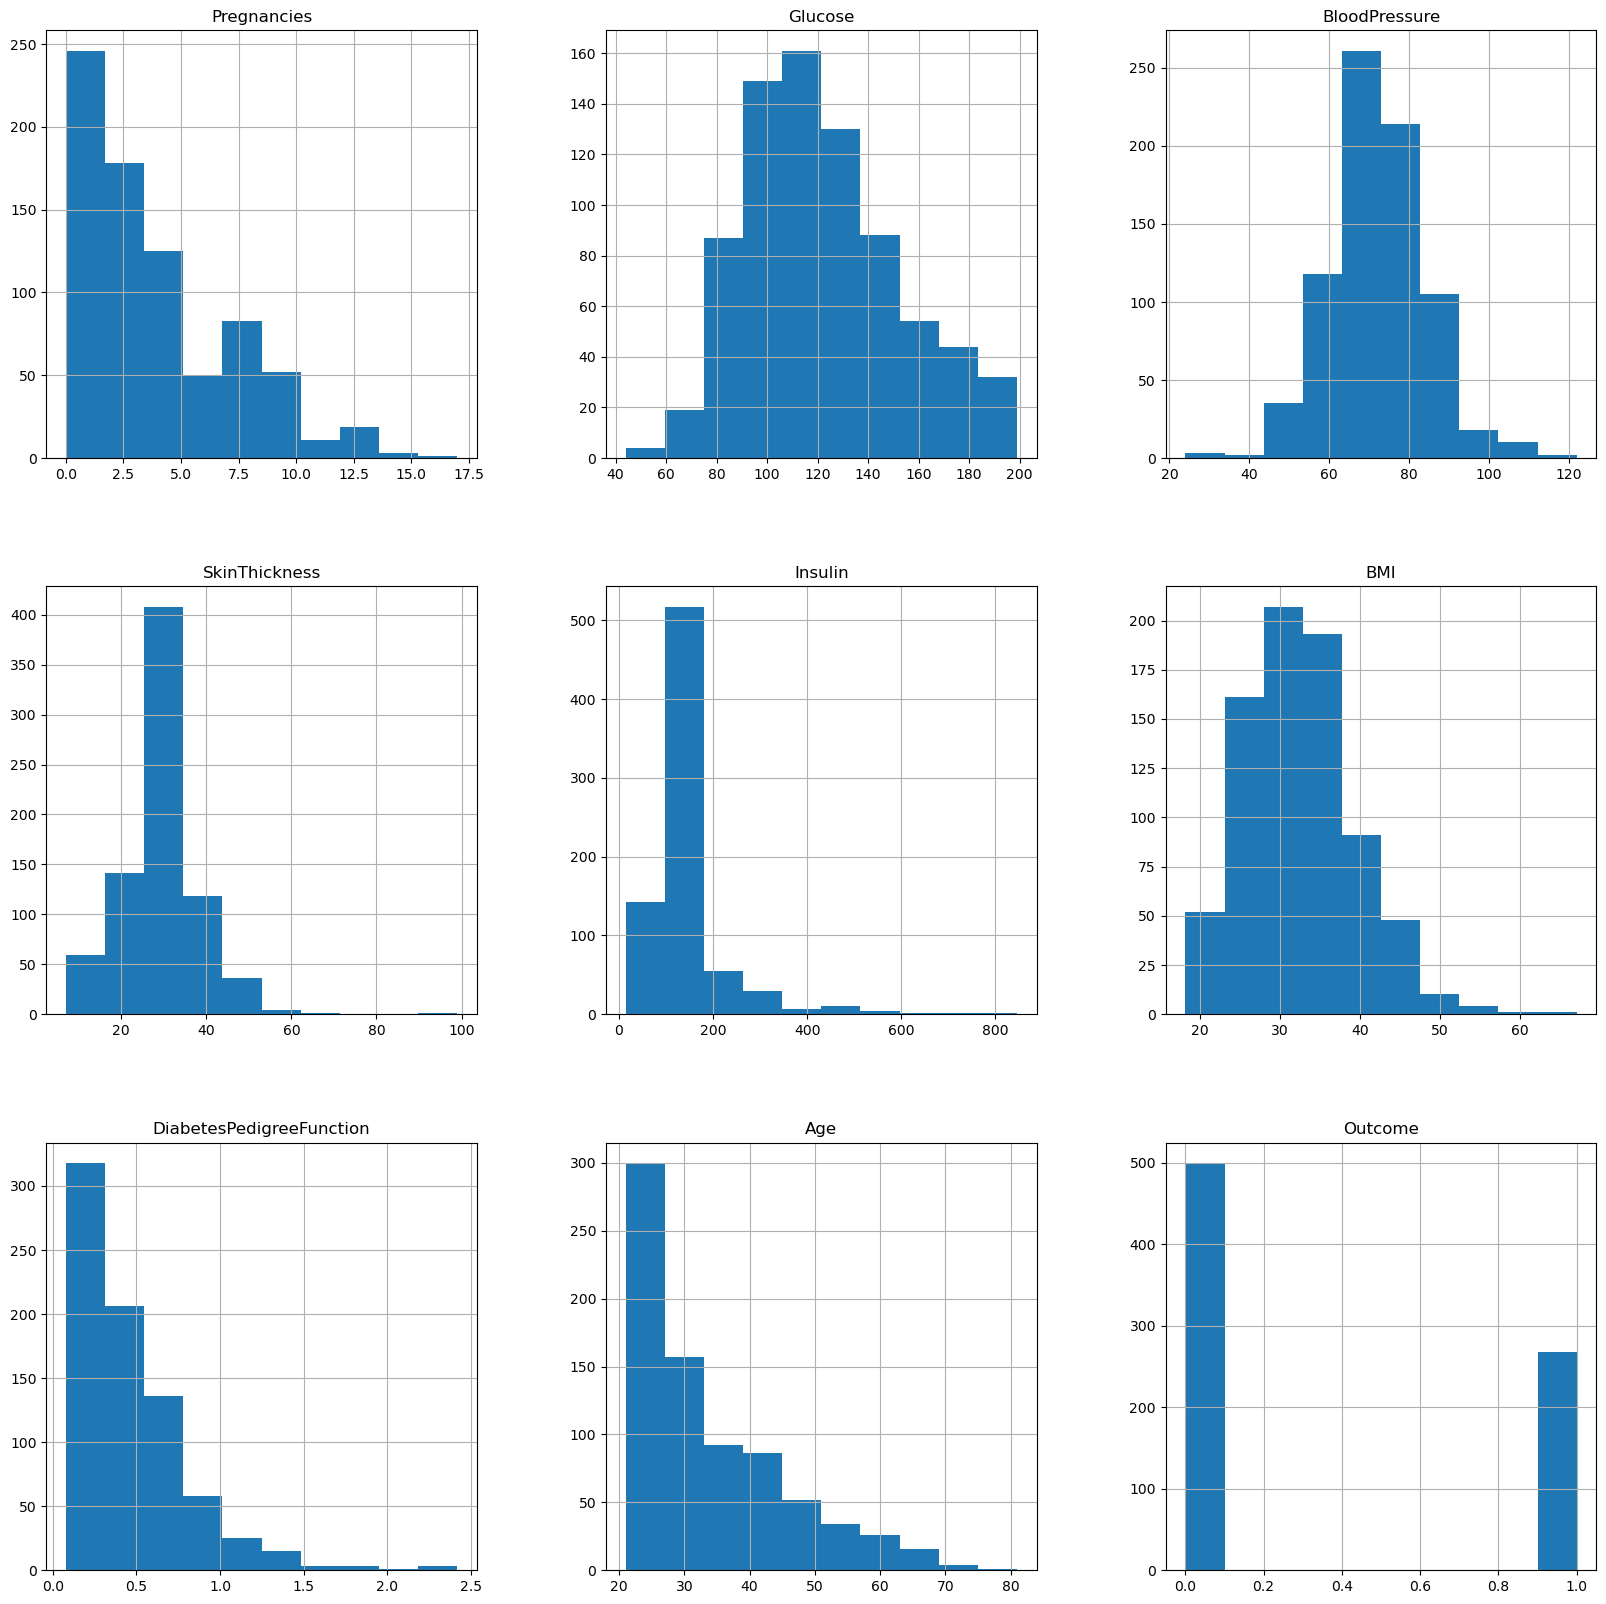

In [22]:
df_copy.hist(figsize=(20,20)) # The glucose and other columns frequency have changed
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64


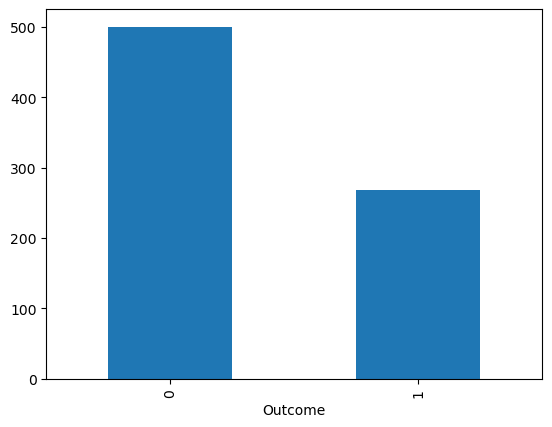

In [23]:
# checking the count of outcome by value. this shows that the number of people that does not have diabetes is doubled the people that have diabetes
color = {1: '#0392cf', 2: '#ff5733'}
colors = df["Outcome"].map(lambda x: color.get(x + 1))
print(df.Outcome.value_counts())
b = df.Outcome.value_counts().plot(kind = "bar")

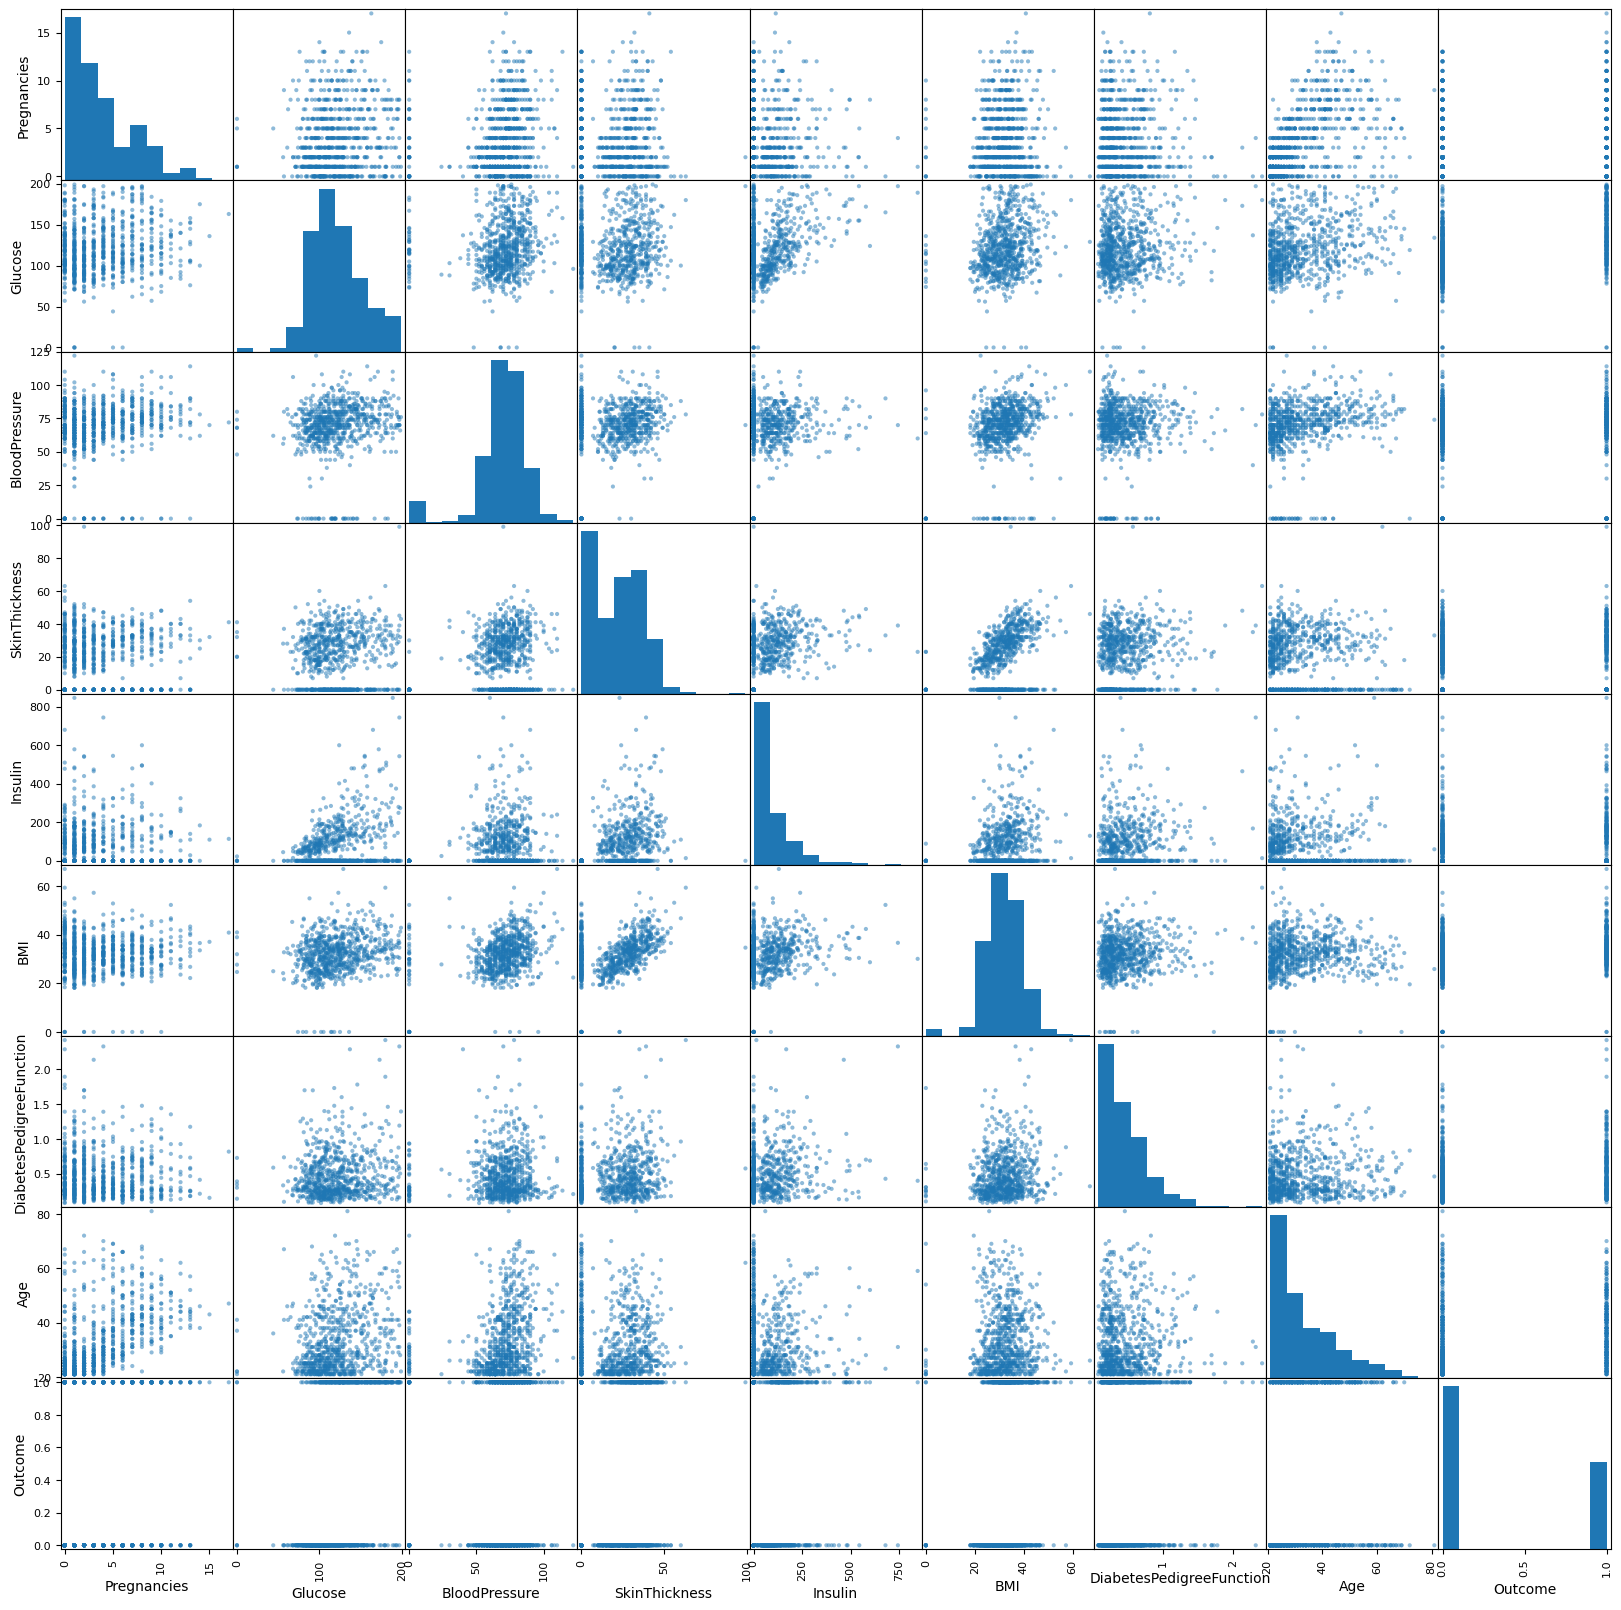

In [24]:
plot = scatter_matrix(df,figsize = (20,20))

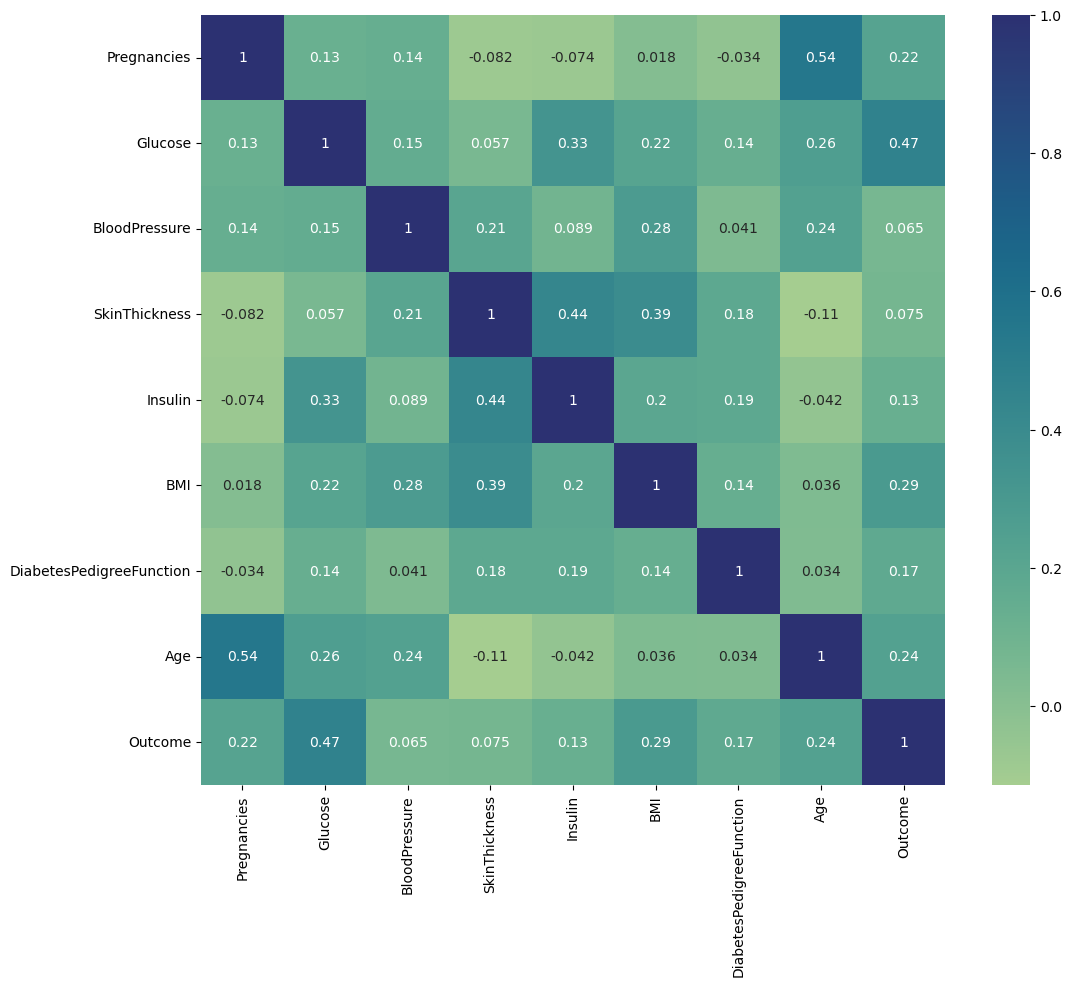

In [25]:
plt.figure(figsize = (12,10))
B = sns.heatmap(df.corr(), annot = True, cmap = 'crest')

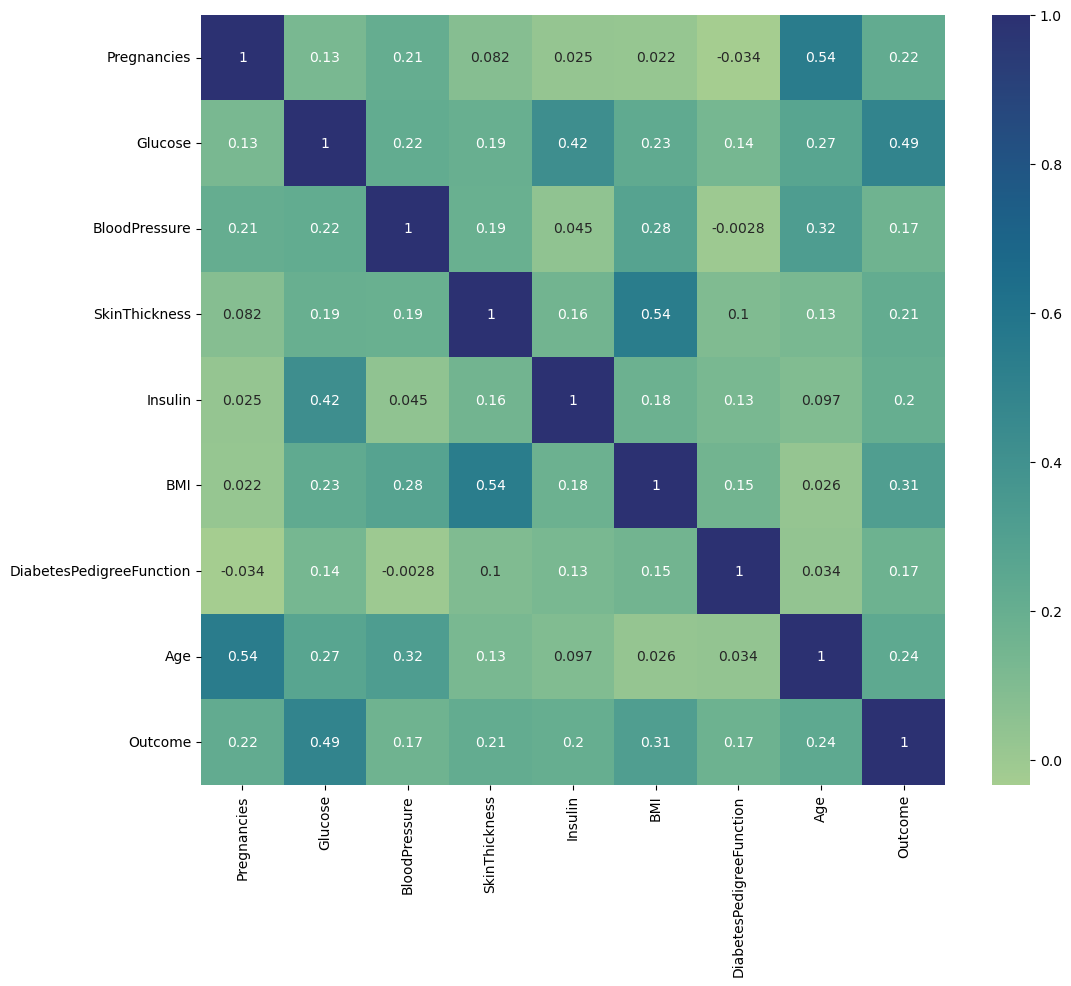

In [26]:
plt.figure(figsize = (12,10))# the new dataset
B = sns.heatmap(df_copy.corr(), annot = True, cmap = 'crest')

In [27]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [28]:
X = df_copy.drop('Outcome', axis = 1)# separating the data and labels
y = df_copy['Outcome']

In [29]:
Scaler = StandardScaler() # data standadization
X_scaled = pd.DataFrame(Scaler.fit_transform(X))

In [30]:
X_scaled

,0,1,2,3,4,5,6,7
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


In [38]:
# splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42,stratify = y )

### training the Modelling

### logistic Regression

In [31]:
model = LogisticRegression()
model.fit(X,y)

C:\Users\DELL\anaconda3\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
LogisticRegression()

LogisticRegression()

In [33]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, cv= 3, scoring='accuracy')

C:\Users\DELL\anaconda3\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

array([0.765625  , 0.75390625, 0.80078125])

In [35]:
prediction = model.predict(X)
print("LR Accuracy of Classifier: ", model.score(X,y))

LR Accuracy of Classifier:  0.7747395833333334


# K-Nearest Neighbour(KNN)

In [44]:
test_scores = []
train_scores = []
for i in range (1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [45]:
train_scores

[1.0,
 0.8417132216014898,
 0.8621973929236499,
 0.8230912476722533,
 0.8156424581005587,
 0.8026070763500931,
 0.7988826815642458,
 0.7988826815642458,
 0.8063314711359404,
 0.7988826815642458,
 0.7914338919925512,
 0.7877094972067039,
 0.7932960893854749,
 0.7877094972067039]

In [46]:
test_scores

[0.670995670995671,
 0.6926406926406926,
 0.7056277056277056,
 0.70995670995671,
 0.696969696969697,
 0.7186147186147186,
 0.70995670995671,
 0.70995670995671,
 0.7142857142857143,
 0.7229437229437229,
 0.696969696969697,
 0.696969696969697,
 0.6926406926406926,
 0.7056277056277056]

In [61]:
max_train_score = max(train_scores)
train_scores_ing = [i for i, v in enumerate(train_scores) if v == max_train_score] 
print ('Max train score {} % and K = {}'.format(max_train_score*100,list(map(lambda x: x+1,train_scores_ing))))

Max train score 100.0 % and K = [1]


In [59]:
max_test_score = max(test_scores)
test_scores_ing = [i for i, v in enumerate(test_scores) if v == max_test_score] 
print ('Max test score {} % and K = {}'.format(max_test_score*100,list(map(lambda x: x+1,test_scores_ing))))

Max test score 72.2943722943723 % and K = [10]


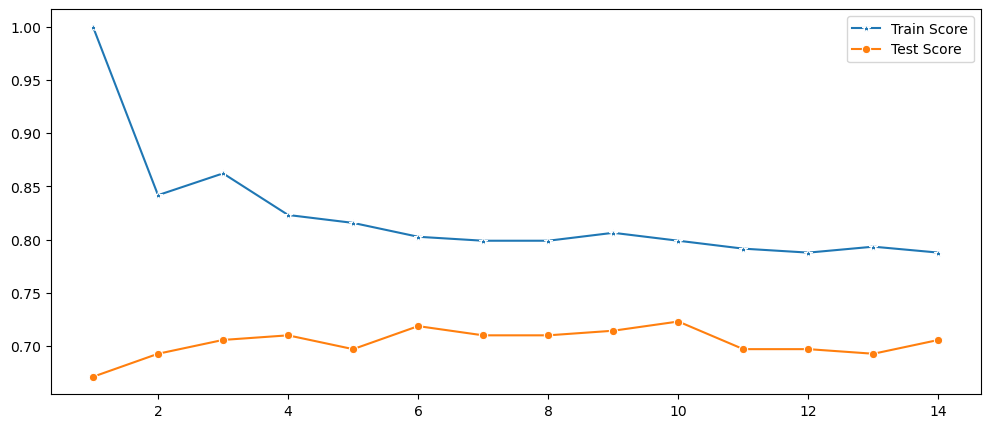

In [60]:
plt.figure(figsize = (12,5))
b = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')

b = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')

In [50]:
knn = KNeighborsClassifier(10)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7229437229437229

In [ ]:
# plot the decision boundry

In [51]:
pip install mlxtend 

value = 20000
width = 20000
plot_decision_regions(X.values,y.values,clf = knn,legend = 2, 
                      filler_feature_values={2: value, 3: value,4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges= {2: width, 3: width,4: width, 5: width, 6: width, 7: width},
                      X_highlight = X_test.values)
plt.title('KNN with Diabetes data')
plt.show()

## confusion matrix


Text(0.5, 23.52222222222222, 'predicted label')

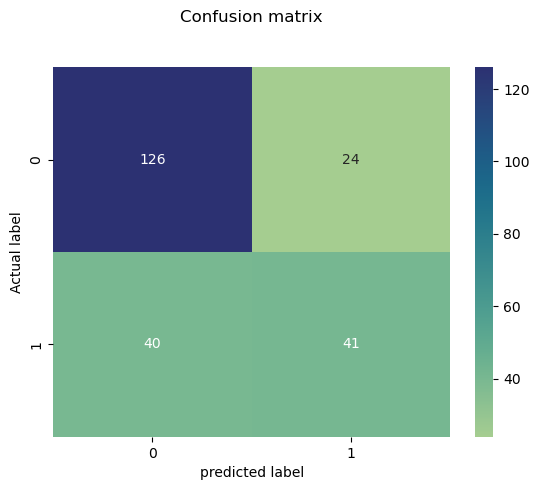

In [56]:
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
b= sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'crest', fmt ='g')
plt.title('Confusion matrix',y= 1.1)
plt.ylabel('Actual label')
plt.xlabel('predicted label')

In [55]:
print(classification_report(y_test,y_pred))  #classification report

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       150
           1       0.63      0.51      0.56        81

    accuracy                           0.72       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.71      0.72      0.71       231



### ROC-AUC CURVE

In [72]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

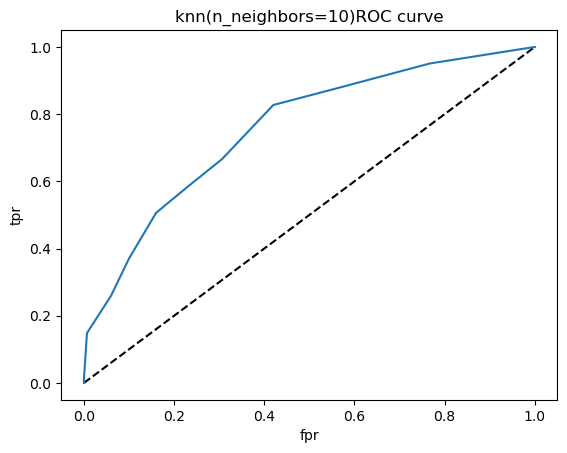

In [73]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label = 'knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('knn(n_neighbors=10)ROC curve')
plt.show()

In [77]:
roc_auc_score(y_test,y_pred_proba)

0.7566666666666667

In [ ]:
# Making a predictive system

In [37]:
input_data = (6,148,72,35,0,33.6,0.627,50)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = Scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('the person is not diabetic')
else:
    print('the person is diabetic')

[[ 0.63994726  0.86510807 -0.03351824  0.67064253 -1.62952723  0.16661938
   0.46849198  1.4259954 ]]
[0]
the person is not diabetic


C:\Users\DELL\anaconda3\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
